# Welcome to Receptiviti!

If this is your first time using the Receptiviti API - check out our [Getting Started guide](https://github.com/Receptiviti/api_tutorials_demos/blob/master/tutorials/python/Getting%20Started.ipynb)

In this Jupyter Notebook, you will learn to aggregate LIWC scores from multiple sentences. This is very useful when analyzing short pieces of text. 

Let's begin with

## Step 1 - Your API Keys
**Don't forget to add your API key and secret into the following cell**

In [22]:
API_KEY = ''
API_SECRET = ''

## Step 2 - Install python libraries

If you are running this notebook within a Google Colab environment, you can skip ahead to [Step 3](#Step-3---Explore-the-dataset). Google Colab provides all the requisite python libraries you will need to execute this Jupyter Notebook. 

If you are running this notebook locally or on your own server setup, determine if your system uses Conda or Pip to manage python dependencies. If you prefer Conda, follow the instructions [here](#Option-2---Conda) to install the requisite python libraries. If you prefer Pip, follow the instructions [here](#Option-3---Pip).

***Remember*** that you will only need to use either Conda ***or*** Pip to set up your python environment locally - not both. 

### Option 1 - Google Colab
Skip ahead to [Step 3](#Step-3---Explore-the-dataset). You're all set!

### Option 2 - Conda
Uncomment the cell below and run

In [ ]:
# import sys
# !conda install --yes --prefix {sys.prefix} requests pandas numpy

### Option 3 - Pip
Uncomment the cell below and run

In [4]:
# import sys
# !{sys.executable} -m pip install requests pandas numpy

## Step 3 - Explore the dataset

We will examine a dataset consisting of commencement speeches given at various universities and colleges in the United States of America between the years 2000 and 2015. The data contains 247 unique speeches made by 231 distinct individuals at 136 different educational institutions. The cell below should give you a snapshot of the data.

This dataset was collected and organized by Receptiviti through various sources available publicly. It has been made available through our [tutorials and demos repository here](https://github.com/Receptiviti/api_tutorials_demos/tree/master/data). 

In [12]:
import pandas as pd
commencement_speech_data_url = "https://raw.githubusercontent.com/Receptiviti/api_tutorials_demos/main/data/commencement_speeches.csv"
speeches_df = pd.read_csv(commencement_speech_data_url)
display(speeches_df.head())

,text_to_score,person,location,year,datetime
0,Speaking to you today marks a milestone in my...,Guy Kawasaki,Babson College,2000,2000-01-01 0:00
1,If I bear in mind the syllabus with which the...,Lewis Lapham,St. John’s College,2003,2003-01-01 0:00
2,Thank you. I want to thank Dr. Nunley and the...,Margaret Spellings,Montgomery College,2006,2006-01-01 0:00
3,Thank you so much for inviting me back to cel...,Angela Ahrendts,Ball State University,2008,2008-01-01 0:00
4,Thank you for asking me to be here today. I k...,Rachel Maddow,Smith College,2010,2010-01-01 0:00


## Step 4 - Create a simple bulk request API helper

In [13]:
import json
import requests

def get_bulk_payload(texts):
    return [{
            "content": text
        } for text in texts]


BULK_API_URL = 'https://api.receptiviti.com/v1/score/bulk'
payload = get_bulk_payload(speeches_df['text_to_score'])
response = requests.post(BULK_API_URL, data=json.dumps(payload), auth=(API_KEY, API_SECRET), headers = {'Content-Type': 'application/json'})
results = []
if response.status_code==200:
    results = response.json()
# print results (truncated)
print(json.dumps(results, indent=4)[0:10000])

{
    "plan_usage": {
        "call_limit": 100000000,
        "calls_made": 1883,
        "calls_remaining": 99998117,
        "percent_used": 0.0,
        "start_date": "2020-11-01T00:00:00Z",
        "end_date": "2020-11-30T23:59:59Z"
    },
    "results": [
        {
            "response_id": "6d9024ea-cefa-4e95-9acc-1cfac109c7b6",
            "language": "en",
            "version": "v1.0.0",
            "summary": {
                "word_count": 2159,
                "words_per_sentence": 11.48404255319149,
                "sentence_count": 188,
                "six_plus_words": 0.2440944881889764,
                "emojis": 0,
                "emoticons": 0,
                "hashtags": 0.009263547938860583,
                "urls": 0
            },
            "liwc": {
                "scores": {
                    "analytical_thinking": 48.45305366240985,
                    "authentic": 45.57363926794219,
                    "clout": 75.93842635479389,
                    "em

## Step 5.1 -  Convert the scores into a table format 

The Receptiviti API outputs a JSON object containing scores. In the cell below, we convert this JSON object into a table format using Python library [pandas](http://pandas.pydata.org/). Once converted into a table format or a dataframe, as it is commonly known, it becomes easier to read and digest.

In [14]:
import pandas as pd

def convert_scores_to_table(results):
    liwc_scores, sallee_scores = [], []
    if len(results)>0:
        for result in results['results']:
            if 'liwc' in result:
                # Pull out liwc scores
                liwc = {'liwc_'+k:v for k,v in result['liwc']['scores']['categories'].items()}
                liwc.update({'liwc_'+k:v for k,v in result['liwc']['scores'].items() if k!='categories'})
                liwc.update({'summary_'+k:v for k,v in result['summary'].items()})
                liwc_scores.append(liwc)

            if 'sallee' in result:
                # Pull out sallee scores
                sallee = {'sallee_' + k: float(v) for k,v in result['sallee']['scores']['emotions'].items()}
                sallee.update({'sallee_' + k: float(v) for k,v in result['sallee']['scores'].items() if k!='emotions'})
                sallee.update({'summary_'+k:v for k,v in result['summary'].items()})
                sallee_scores.append(sallee)
    return (pd.DataFrame(liwc_scores), pd.DataFrame(sallee_scores))

## Step 5.2 - Display the scores in table format

In [15]:
liwc_df, sallee_df = convert_scores_to_table(results)
print("LIWC as a table")
display(liwc_df.head())

LIWC as a table


,liwc_achievement,liwc_adjectives,liwc_adverbs,liwc_affect,liwc_affiliation,liwc_all_punctuation,liwc_anger_words,liwc_anxiety_words,liwc_apostrophes,liwc_articles,...,liwc_emotional_tone,liwc_dictionary_words,summary_word_count,summary_words_per_sentence,summary_sentence_count,summary_six_plus_words,summary_emojis,summary_emoticons,summary_hashtags,summary_urls
0,0.027327,0.057434,0.046781,0.069477,0.018527,0.201945,0.005095,0.001390,0.020843,0.062066,...,85.630827,0.919870,2159,11.484043,188,0.244094,0,0.0,0.009264,0
1,0.012473,0.056941,0.031453,0.049078,0.014913,0.130152,0.004881,0.004338,0.013557,0.111714,...,33.731329,0.825380,3688,35.805825,103,0.281725,0,0.0,0.000000,0
2,0.030829,0.045279,0.047206,0.041908,0.025048,0.181118,0.001927,0.001445,0.037572,0.053468,...,77.969755,0.912331,2076,15.264706,136,0.245665,0,0.0,0.000000,0
3,0.023101,0.056310,0.041005,0.061507,0.025700,0.158533,0.002021,0.004332,0.014150,0.060352,...,90.291136,0.892579,3463,20.491124,169,0.272307,0,0.0,0.000000,0
4,0.027722,0.047810,0.047007,0.060667,0.008035,0.156689,0.007634,0.002411,0.018080,0.077541,...,63.089656,0.880273,2489,21.643478,115,0.282443,0,0.0,0.000000,0


## Step 6 - Display LIWC `certainty` over time

The `certainty` category in liwc is indicative of words such as always or never etc that indicate a sense of certainty in the text. This dataset contains commencement speeches given at various universities and colleges around the US - so it is quite likely to give us information about how certain the speakers felt about the times during which they gave their speech.

We will start by joining the scores to the original speeches and sorting them in ascending order of date

In [16]:
liwc_speeches_df = liwc_df.join(speeches_df)
liwc_speeches_df['datetime'] = liwc_speeches_df['datetime'].apply(pd.to_datetime)
liwc_speeches_df.sort_values(by="datetime", inplace=True)

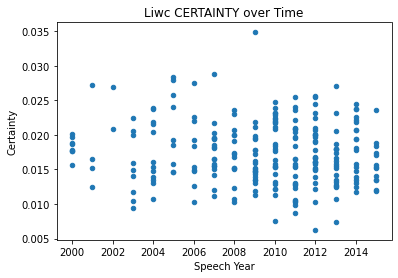

In [17]:
liwc_score_name = "certainty"
liwc_score_field = "liwc_" + liwc_score_name
axes = liwc_speeches_df.plot.scatter(x = "datetime", y = liwc_score_field,
                                    title = "Liwc {} over Time".format(liwc_score_name.upper()))
_ = axes.set_ylabel(liwc_score_name.capitalize())
_ = axes.set_xlabel("Speech Year")

## Step 7 - Aggregating LIWC Scores

From the scatter plot above, we can see that there is significant variation of the LIWC score `certainty` in each  year. Let's aggregate our LIWC score - 1 year at a time.

We will do this in the following manner:
$$Aggregated Liwc Score = \sum_{i=0}^{n} \frac{wc_i*score_i}{wc_i}$$

where $score$ is any liwc raw score eg - raw `certainty`

$n$ is the number of pieces of text to aggregate over

$wc_i$ is the word count of the $i^{th}$ piece of text 

In the following snippet, we will compute a weighted average of the LIWC score `certainty` by grouping over a period of 1 year in the dataset

In [18]:
import numpy as np
wtd_avg = lambda x: np.average(x, weights=liwc_speeches_df.loc[x.index, "summary_word_count"])

agg_liwc_speeches_df = liwc_speeches_df.groupby([liwc_speeches_df['year']]).agg(agg_score=(liwc_score_field, wtd_avg))
agg_liwc_speeches_df.index.names = ['year']
agg_liwc_speeches_df.reset_index(inplace=True)
agg_liwc_speeches_df['month'] = '12'
agg_liwc_speeches_df['day'] = '01'
agg_liwc_speeches_df['date'] = pd.to_datetime(agg_liwc_speeches_df[['year', 'month', 'day']])
print("LIWC certainty aggregated and grouped by year")
display(agg_liwc_speeches_df.head())


LIWC certainty aggregated and grouped by year


,year,agg_score,month,day,date
0,2000,0.018031,12,01,2000-12-01
1,2001,0.017060,12,01,2001-12-01
2,2002,0.022622,12,01,2002-12-01
3,2003,0.015887,12,01,2003-12-01
4,2004,0.016784,12,01,2004-12-01


### Step 7.1 - Combine with data about macrotrends
Data Source: [Macrotrends](https://www.macrotrends.net)

The 100 year historical average of the Dow Jones was originally obtained from [Macrotrends](https://www.macrotrends.net/1319/dow-jones-100-year-historical-chart)

It was then filtered to include only the years that overlap with the dates in the commencement speeches dataset i.e. between 2000 and 2015 (included) and made available through Receptiviti's [tutorials and demos repository here](https://github.com/Receptiviti/api_tutorials_demos/tree/master/data). 

In [20]:
historical_dow_jones_url = "https://raw.githubusercontent.com/Receptiviti/api_tutorials_demos/main/data/dow_jones_historical_average.csv"
historical_dow_jones = pd.read_csv(historical_dow_jones_url)
historical_dow_jones['date'] = pd.to_datetime(historical_dow_jones['date'])
historical_dow_jones['value'] = historical_dow_jones['value']/10000
liwc_speeches_dow_df = agg_liwc_speeches_df.merge(historical_dow_jones, on='date')
liwc_speeches_dow_df.rename(columns={'agg_score': liwc_score_name, 'value': 'dow_returns'}, inplace=True)
print("Macrotrends - Dow Jones historical yearly return averages\n2000-2015")
display(liwc_speeches_dow_df.head())

Macrotrends - Dow Jones historical yearly return averages
2000-2015


,year,certainty,month,day,date,dow_returns
0,2000,0.018031,12,01,2000-12-01,-0.000617
1,2001,0.017060,12,01,2001-12-01,-0.000710
2,2002,0.022622,12,01,2002-12-01,-0.001676
3,2003,0.015887,12,01,2003-12-01,0.002532
4,2004,0.016784,12,01,2004-12-01,0.000315


## Step 8 - Display aggregated LIWC `certainty` over time

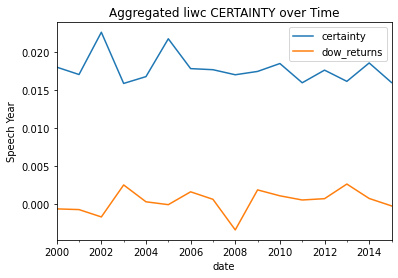

In [21]:
axes = liwc_speeches_dow_df.set_index('date')[[liwc_score_name, 'dow_returns']].plot()
_ = axes.set_ylabel("Speech Year")
_ = axes.set_title("Aggregated liwc {} over Time".format(liwc_score_name.upper()))

Now that we have aggregated LIWC `certainty` by year, a pattern appears.

Notice that around the 2008 financial crisis the dow returns (red) dips and LIWC `certainty` (blue) decreases slightly. In general, we can see that the certainty reflected in the aggregated commencement speeches is reflective of the expected pattern in increase or decrease of the dow jones industrial average for the next year.

This pattern is not obvious from the initial scatter plot of `certainty` that we made [earlier in Step 6](#Step-6---Display-LIWC-certainty-over-time). Use aggregation of LIWC scores in similar instances, as well as in cases where each piece of scored text has low word count (~ < 250 words) eg. Tweets to cut through the noise and reveal hidden insight. 